In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

In [3]:
train_values.shape

(260601, 39)

As we can see, we have 39 features and 260601 records

In [4]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


Now we have to predict the damage's class (`damage_grade`)
  - Explore how many class has this feature

In [6]:
print('\"damage_grade\" has {} class'.format(train_labels.damage_grade.unique()))

"damage_grade" has [3 2 1] class


From dataset explaination, we know that 1 indicate a minor damage. 3 indicate a chatastrofic damage.
  - This is the feature to predict.
  
Now merge the two table into one.

In [7]:
train = train_values.set_index('building_id').join(train_labels.set_index('building_id'), on='building_id')
train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


`building_id` become the index of the dataframe and we have the new feature `damage_grade` into the dataset.

In [8]:
train.isna().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

In [9]:
fl = list(train.columns.values)

In [10]:
fl

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_sec

In [11]:
features = ['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'damage_grade']

In [12]:
train = train[features]

Today, we are lucky... no `nan` values are in the dataset.

In [13]:
train.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
def print_corr_matrix(df, size=15):
    plt.figure(figsize=(size, size))
    sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True), vmax=1, vmin=-1, center=0)
    plt.title('Correlation')
    plt.show()

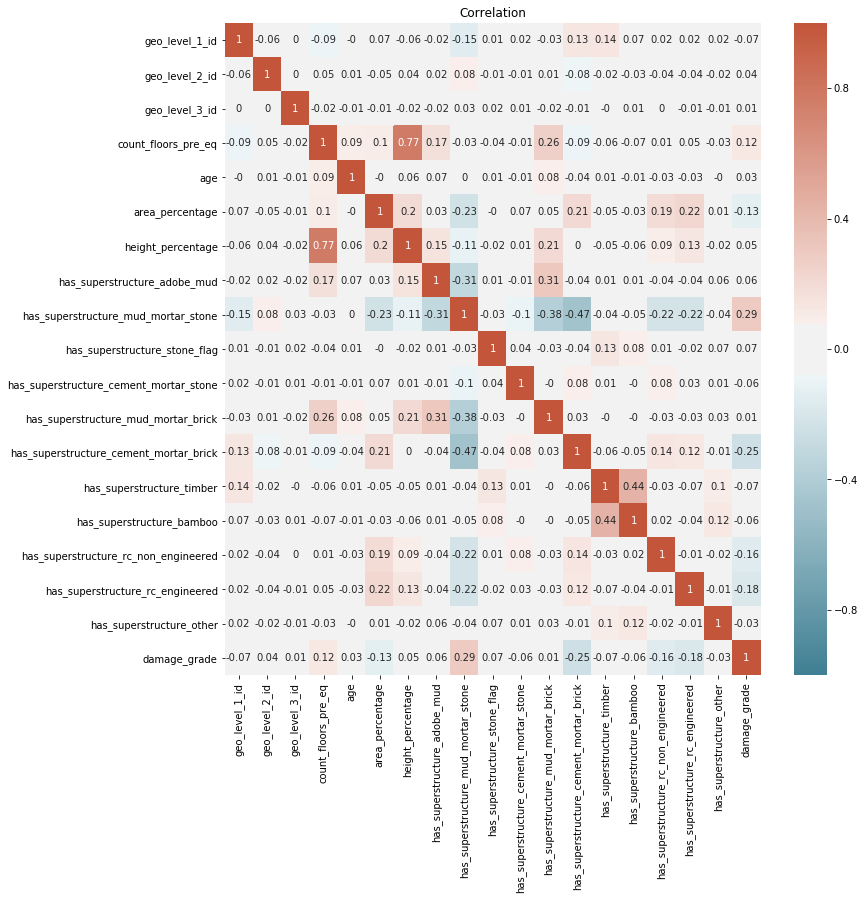

In [15]:
corr = round(train.corr(), 2)
print_corr_matrix(corr, size=12)

In [16]:
lsc = pd.get_dummies(train['land_surface_condition'], prefix='land_surface_condition')
ft = pd.get_dummies(train['foundation_type'], prefix='foundation_type')
rt = pd.get_dummies(train['roof_type'], prefix='roof_type')
gft = pd.get_dummies(train['ground_floor_type'], prefix='ground_floor_type')
oft = pd.get_dummies(train['other_floor_type'], prefix='other_floor_type')
pos = pd.get_dummies(train['position'], prefix='position')
pc = pd.get_dummies(train['plan_configuration'], prefix='plan_configuration')

train = pd.concat([train, lsc, ft, rt, gft, oft, pos, pc], axis=1)

train.drop(['land_surface_condition', 'foundation_type','roof_type','ground_floor_type', 'other_floor_type', 'position', 'plan_configuration'], inplace=True, axis=1)
train.shape

(260601, 53)

In [17]:
def pie_plot(df, feature, **options):
    df[feature].value_counts().sort_index().plot.pie(**options)

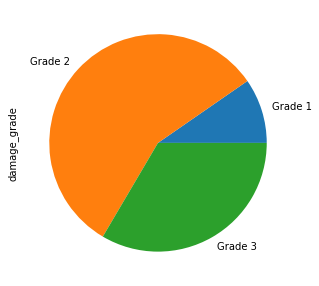

In [18]:
pie_plot(train, 'damage_grade', labels=['Grade 1', 'Grade 2', 'Grade 3'], figsize=(5, 5))

In [19]:
features_list = train.columns.tolist()
features_list.remove('damage_grade')

In [20]:
def get_df_with_uniform_class(df, uniform_count):
    new_df = df.copy()

    tmp_2 = new_df[new_df['damage_grade'] == 2]
    tmp_3 = new_df[new_df['damage_grade'] == 3]

    new_df.drop(tmp_2.sample(len(tmp_2) - uniform_count).index, inplace=True)
    new_df.drop(tmp_3.sample(len(tmp_3) - uniform_count).index, inplace=True)
    
    return new_df

In [21]:
uniform_train = get_df_with_uniform_class(train, len(train[train.damage_grade == 1]))

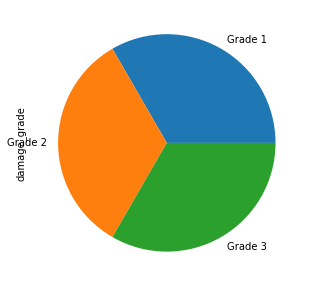

In [22]:
pie_plot(uniform_train, 'damage_grade', labels=['Grade 1', 'Grade 2', 'Grade 3'], figsize=(5, 5))

In [23]:
y = train.drop(features_list, axis=1)
X = train.drop(['damage_grade'], axis=1)

y_uniform = uniform_train.drop(features_list, axis=1)
X_uniform = uniform_train.drop(['damage_grade'], axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X.astype(float), y, test_size=0.3, random_state=43)
X_uniform_train, X_uniform_val, y_uniform_train, y_uniform_val = train_test_split(X_uniform.astype(float), y_uniform, test_size=0.3, random_state=53)

# Perceptron

In [25]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

perceptron_model = Perceptron(penalty='l2', alpha=0.0005, max_iter=1000, tol=1e-3)

print('Perceptron without standard scaler:')

perceptron_model.fit(X_train, y_train)
print('With unbalanced df {:.2f}%'.format(perceptron_model.score(X_val, y_val)*100))

perceptron_model.fit(X_uniform_train, y_uniform_train)
print('With balanced df {:.2f}%'.format(perceptron_model.score(X_uniform_val, y_uniform_val)*100))

Perceptron without standard scaler:


/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


With unbalanced df 56.92%


/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


With balanced df 33.05%


Now try to Standardize the input data

In [26]:
perceptron_model = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(penalty='l2', alpha=0.0005, max_iter=1000, tol=1e-3))
])

print('Perceptron with standard scaler:')

perceptron_model.fit(X_train, y_train)
print('With unbalanced df {:.2f}%'.format(perceptron_model.score(X_val, y_val)*100))

perceptron_model.fit(X_uniform_train, y_uniform_train)
print('With balanced df {:.2f}%'.format(perceptron_model.score(X_uniform_val, y_uniform_val)*100))

Perceptron with standard scaler:


/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


With unbalanced df 53.43%


/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


With balanced df 45.73%


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

lr_model = LogisticRegression(solver='liblinear', multi_class='auto', penalty='l2', C=15, random_state=43)

lr_model.fit(X_train, y_train.values.ravel())
print('With unbalanced df {:.2f}%'.format(lr_model.score(X_val, y_val)*100))

lr_model.fit(X_uniform_train, y_uniform_train.values.ravel())
print('With balanced df {:.2f}%'.format(lr_model.score(X_uniform_val, y_uniform_val)*100))

With unbalanced df 57.91%


In [ ]:
lr_model = Pipeline([
    ('std', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('lr', LogisticRegression(solver='liblinear', multi_class='auto', penalty='l2', C=15, random_state=43)),
])

lr_model.fit(X_train, y_train)
print('With unbalanced df {:.2f}%'.format(lr_model.score(X_val, y_val)*100))

lr_model.fit(X_uniform_train, y_uniform_train)
print('With balanced df {:.2f}%'.format(lr_model.score(X_uniform_val, y_uniform_val)*100))

/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Gaussian Naive Bayes

In [30]:
gnb_model = Pipeline([
    ('std', StandardScaler()),
    ('gnb', GaussianNB(var_smoothing=1e-2))
])

gnb_model.fit(X_train, y_train)
print('With unbalanced df {:.2f}%'.format(gnb_model.score(X_val, y_val)*100))

gnb_model.fit(X_uniform_train, y_uniform_train)
print('With balanced df {:.2f}%'.format(gnb_model.score(X_uniform_val, y_uniform_val)*100))

With unbalanced df 42.17%
With balanced df 53.96%


# Nearest Neighbours

In [37]:
from sklearn.neighbors import KNeighborsClassifier

nearestn_model = KNeighborsClassifier(n_neighbors=10)

nearestn_model.fit(X_train, y_train)
print('With unbalanced df {:.2f}%'.format(nearestn_model.score(X_val, y_val)*100))

nearestn_model.fit(X_uniform_train, y_uniform_train)
print('With balanced df {:.2f}%'.format(nearestn_model.score(X_uniform_val, y_uniform_val)*100))

With unbalanced df 70.59%
With balanced df 62.14%


In [ ]:
nearestn_model = Pipeline([
    ('std', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=10))
])

nearestn_model.fit(X_train, y_train)
print('With unbalanced df {:.2f}%'.format(nearestn_model.score(X_val, y_val)*100))

nearestn_model.fit(X_uniform_train, y_uniform_train)
print('With balanced df {:.2f}%'.format(nearestn_model.score(X_uniform_val, y_uniform_val)*100))

## KNN Grid Search

In [44]:
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier(n_jobs=-1)

grid = {
    'n_neighbors': [5, 10, 15],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
}

knn_gs_model = GridSearchCV(knn_model, grid, cv=5, n_jobs=-1, return_train_score=True)
knn_gs_model.fit(X.astype(float), y)

/usr/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [5, 10, 15], 'algorithm': ['auto', 'ball_tree', 'kd_tree']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [45]:
pd.DataFrame(knn_gs_model.cv_results_).sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,4.331425,1.347896,9.356175,1.506584,auto,10,"{'algorithm': 'auto', 'n_neighbors': 10}",0.714779,0.708064,0.710309,...,0.711306,0.002278,1,0.755598,0.757564,0.756039,0.757081,0.757213,0.756699,0.000749
7,6.339319,2.435318,8.427968,0.824834,kd_tree,10,"{'algorithm': 'kd_tree', 'n_neighbors': 10}",0.714779,0.708064,0.710309,...,0.711306,0.002278,1,0.755598,0.757564,0.756039,0.757081,0.757213,0.756699,0.000749
4,19.069358,8.974549,39.105361,8.299846,ball_tree,10,"{'algorithm': 'ball_tree', 'n_neighbors': 10}",0.714299,0.707949,0.710635,...,0.711156,0.002132,3,0.755809,0.757785,0.756120,0.757091,0.757242,0.756809,0.000734
2,6.780618,1.597916,13.919810,1.245867,auto,15,"{'algorithm': 'auto', 'n_neighbors': 15}",0.710155,0.701656,0.706951,...,0.706229,0.003024,4,0.739399,0.741659,0.740517,0.740912,0.740363,0.740570,0.000737
8,4.517753,2.299542,7.396129,1.818774,kd_tree,15,"{'algorithm': 'kd_tree', 'n_neighbors': 15}",0.710155,0.701656,0.706951,...,0.706229,0.003024,4,0.739399,0.741659,0.740517,0.740912,0.740363,0.740570,0.000737


In [47]:
from sklearn.linear_model import RidgeClassifierCV

ridge_model = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])

ridge_model.fit(X_train, y_train)
print('With unbalanced df {:.2f}%'.format(ridge_model.score(X_val, y_val)*100))

ridge_model.fit(X_uniform_train, y_uniform_train)
print('With balanced df {:.2f}%'.format(ridge_model.score(X_uniform_val, y_uniform_val)*100))

With unbalanced df 58.77%
With balanced df 57.27%


# XGBoost

In [60]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective='multi:softmax',
                          num_class=3, 
                          learning_rate=0.02, 
                          n_estimators=600, 
                          n_jobs=-1,
                          colsample_bytree=0.8,
                          gamma=1,
                          max_depth=20,
                          min_child_weight=5,
                          subsample=0.6, tree_method='gpu_hist')

xgb_model.fit(X_train, y_train)
print('With unbalanced df {:.2f}%'.format(xgb_model.score(X_val, y_val)*100))

xgb_model.fit(X_uniform_train, y_uniform_train)
print('With balanced df {:.2f}%'.format(xgb_model.score(X_uniform_val, y_uniform_val)*100))

With unbalanced df 74.13%
With balanced df 72.30%


In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers

scaler_X = StandardScaler()
std_X_train = scaler_X.fit_transform(X_train.astype(float))
std_X_val = scaler_X.transform(X_val)

std_y_train = to_categorical(y_train.values.ravel() - 1)
std_y_val = to_categorical(y_val.values.ravel() - 1)

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

def nn_build_model():
    model = Sequential([
        Dense(64, input_shape=[X.shape[1]]),
        Dense(128, activation=tf.nn.relu),
        Dense(200, activation=tf.nn.relu),
        Dense(128, activation=tf.nn.relu),
        Dense(256, activation=tf.nn.relu),
        Dense(512, activation=tf.nn.relu),
        Dense(128, activation=tf.nn.relu),
        Dense(3, activation=tf.nn.softmax)
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [40]:
model = nn_build_model()
history = model.fit(std_X_train, std_y_train, validation_split=0.2, epochs=30, verbose=0, callbacks=[PrintDot()])


..............................

In [41]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    plt.ylim([0,2])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
    plt.ylim([0.4, 1])
    plt.legend()
    plt.show()

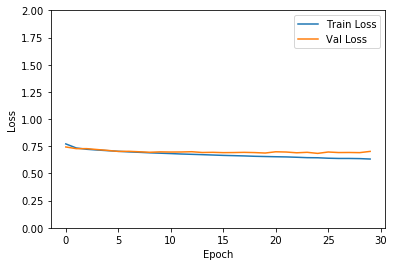

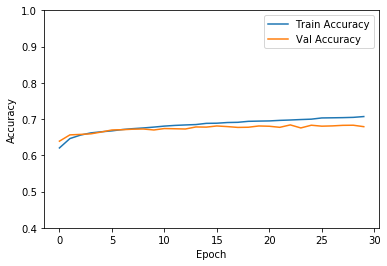

In [42]:
hist = pd.DataFrame(history.history)
plot_history(history)

In [43]:
print(hist)

        loss       acc  val_loss   val_acc
0   0.771707  0.620313  0.743427  0.639020
1   0.734173  0.646249  0.728002  0.656397
2   0.722198  0.655726  0.728099  0.657713
3   0.715308  0.661927  0.719717  0.659303
4   0.709410  0.664983  0.711875  0.664319
5   0.703730  0.667443  0.702427  0.669910
6   0.698225  0.671150  0.703489  0.670678
7   0.694315  0.673576  0.699278  0.672103
8   0.689721  0.675522  0.694700  0.672624
9   0.686187  0.677872  0.698388  0.669910
10  0.682748  0.680627  0.696895  0.673884
11  0.678782  0.682518  0.697398  0.673281
12  0.675873  0.683800  0.699763  0.672624
13  0.672781  0.684876  0.692690  0.678243
14  0.669448  0.688192  0.694142  0.677831
15  0.666007  0.688596  0.691388  0.681011
16  0.663667  0.690488  0.692122  0.679257
17  0.661151  0.691091  0.693853  0.677009
18  0.657707  0.693777  0.691792  0.677502
19  0.655592  0.694421  0.687690  0.680983
20  0.653621  0.694901  0.699221  0.680216
21  0.651987  0.696435  0.696955  0.677256
22  0.64881

# SVM

In [109]:
from sklearn import svm

svm_model = svm.SVC(gamma='scale', decision_function_shape='ovo')

svm_model.fit(X_train, y_train)
print('With unbalanced df {:.2f}%'.format(svm_model.score(X_val, y_val)*100))

svm_model.fit(X_uniform_train, y_uniform_train)
print('With balanced df {:.2f}%'.format(svm_model.score(X_uniform_val, y_uniform_val)*100))

With unbalanced df 56.92%
With balanced df 36.20%


# Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lr_model = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=17, multi_class='multinomial', max_iter=8000))     
])

grid = [
    {'lr__solver': ['newton-cg'], 'lr__C': np.arange(0.6, 1, 0.1)},
    {'lr__solver': ['lbfgs'], 'lr__C': np.arange(0.6, 1, 0.1)},
    {'lr__solver': ['sag'], 'lr__C': np.arange(0.6, 1, 0.1)},
    {'lr__solver': ['saga'], 'lr__C': np.arange(0.6, 1, 0.1)},
]

lr_gs = GridSearchCV(lr_model, grid, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)
lr_gs.fit(X.astype(float), y.values.ravel())

In [ ]:
pd.DataFrame(lr_gs.cv_results_).sort_values('rank_test_score').head(1)['mean_test_score']

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_model = Pipeline([
    ('std_scaler', StandardScaler()),
    ('gnv', GaussianNB())     
])

grid = [
    {'gnv__var_smoothing': np.logspace(-12, -6, 3)}
]

gnb_gs = GridSearchCV(gnb_model, grid, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)
gnb_gs.fit(X.astype(float), y.values.ravel())

In [ ]:
pd.DataFrame(gnb_gs.cv_results_).sort_values('rank_test_score').head(1)['mean_test_score']

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

clf = Pipeline([
    ('scl', StandardScaler()),
    ('pcp', Perceptron(tol=1e-2, random_state=0, penalty='l2'))
])
p_scores = cross_val_score(clf, X.astype(float), y.values.ravel(), cv=5)
p_scores.mean()

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

X_train, X_test, y_train, y_test = train_test_split(X.astype(float), y.values.ravel(), test_size=0.33, random_state=42)

xgb = Pipeline([
    ('std', StandardScaler()),
    ('xgb', XGBClassifier(objective='multi:softmax', num_class=3, max_depth=15, learning_rate=0.02, n_estimators=100, n_jobs=-1))
])

grid = {
    'xgb__min_child_weight': [5, 10],
    'xgb__gamma': [0.5, 1],
    'xgb__subsample': [0.6, 0.8],
    'xgb__colsample_bytree': [0.8, 1.0],
    'xgb__max_depth': [20, 30]
}

clf = GridSearchCV(xgb, grid, n_jobs=-1, cv=5, scoring='accuracy', verbose=2, refit=True)
clf.fit(X.astype(float), y.values.ravel())

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values('rank_test_score').head(3)

In [ ]:
from xgboost import plot_importance

xgb_model = XGBClassifier(objective='multi:softmax',
                          num_class=3, 
                          learning_rate=0.02, 
                          n_estimators=600, 
                          n_jobs=-1,
                          colsample_bytree=0.8,
                          gamma=1,
                          max_depth=20,
                          min_child_weight=5,
                          subsample=0.6)

xgb_model.fit(X.astype(float), y.values.ravel())

In [ ]:
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(xgb_model, height=0.8, ax=ax)
plt.show()

In [ ]:
X.drop(['has_secondary_use_rental', 'plan_configuration_s', 
        'plan_configuration_c', 'plan_configuration_a', 
        'plan_configuration_o', 'plan_configuration_d', 
        'plan_configuration_q', 'plan_configuration_u',
        'legal_ownership_status_v', 'legal_ownership_status_a',
        'legal_ownership_status_w', 'legal_ownership_status_r',
       ], axis=1, inplace=True)
X_train.drop(['has_secondary_use_rental', 'plan_configuration_s', 
        'plan_configuration_c', 'plan_configuration_a', 
        'plan_configuration_o', 'plan_configuration_d', 
        'plan_configuration_q', 'plan_configuration_u',
        'legal_ownership_status_v', 'legal_ownership_status_a',
        'legal_ownership_status_w', 'legal_ownership_status_r',
       ], axis=1, inplace=True)
X_test.drop(['has_secondary_use_rental', 'plan_configuration_s', 
        'plan_configuration_c', 'plan_configuration_a', 
        'plan_configuration_o', 'plan_configuration_d', 
        'plan_configuration_q', 'plan_configuration_u',
        'legal_ownership_status_v', 'legal_ownership_status_a',
        'legal_ownership_status_w', 'legal_ownership_status_r',
       ], axis=1, inplace=True)

In [ ]:
new_xgb_model = XGBClassifier(objective='multi:softmax',
                          num_class=3, 
                          learning_rate=0.02, 
                          n_estimators=600, 
                          n_jobs=-1,
                          colsample_bytree=0.8,
                          gamma=1,
                          max_depth=20,
                          min_child_weight=5,
                          subsample=0.6)

new_xgb_model.fit(X_train.astype(float), y_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

y_pred = new_xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
clf = GridSearchCV(xgb, grid, n_jobs=-1, cv=5, scoring='accuracy', verbose=2, refit=True)
clf.fit(X.astype(float), y.values.ravel())

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values('rank_test_score').head(3)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

bg = Pipeline([
    #('std', StandardScaler()),
    ('bg', BaggingClassifier(DecisionTreeClassifier(criterion='entropy'), n_jobs=-1, max_features=0.3, max_samples=0.3, n_estimators=300, oob_score=True))
])
bg.fit(X_train, y_train)

In [ ]:
bg.score(X_test, y_test)

In [ ]:
y_pred = bg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()